<a href="https://colab.research.google.com/github/PriyankaMittapelly/SaiPriyanka_INFO5731_-Fall2020/blob/main/ML_assignmnet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
input = pd.read_csv("/content/monet.csv")
input.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [4]:
# considering the rows that doesnt have null values

values = pd.notnull(input)
dataa = input[values]

In [5]:
dataa

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1
426,9.352500,25.9,39.6,1,375,2
427,8.252500,25.6,39.6,1,375,1
428,3.410000,25.6,39.4,1,386,2


In [6]:
#Size = Width * Height
dataa["SIZE"] = dataa["HEIGHT"] * dataa["WIDTH"] 
dataa

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40
...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,1008.64
426,9.352500,25.9,39.6,1,375,2,1025.64
427,8.252500,25.6,39.6,1,375,1,1013.76
428,3.410000,25.6,39.4,1,386,2,1008.64


In [7]:
np.random.seed(10)

import seaborn as sns
import matplotlib.pyplot as plt

print(dataa.corr())


            PRICE    HEIGHT     WIDTH    SIGNED   PICTURE    HOUSE       SIZE
PRICE    1.000000  0.314581  0.346881  0.136362  0.106078 -0.039878  0.347227
HEIGHT   0.314581  1.000000  0.503280 -0.145835  0.041556 -0.095278  0.810881
WIDTH    0.346881  0.503280  1.000000 -0.109218  0.046845 -0.169441  0.853942
SIGNED   0.136362 -0.145835 -0.109218  1.000000  0.009664 -0.132464 -0.198969
PICTURE  0.106078  0.041556  0.046845  0.009664  1.000000 -0.008359  0.090118
HOUSE   -0.039878 -0.095278 -0.169441 -0.132464 -0.008359  1.000000 -0.124385
SIZE     0.347227  0.810881  0.853942 -0.198969  0.090118 -0.124385  1.000000


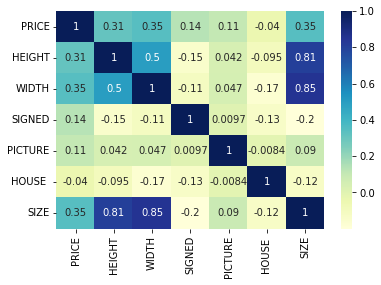

In [8]:
#plotting co-relation  heatmap
dataplot = sns.heatmap(dataa.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
from above co-relation matrix , we can conclude that price is having highest co-relation with width and size
 as well as height and width are co-related to each other

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


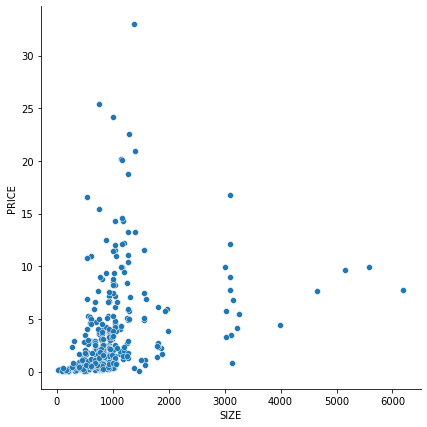

In [87]:
#scatterplot between the SIZE as independent and Price as dependent


sns.pairplot(dataa, x_vars=['SIZE'], 
             y_vars='PRICE', size=6, aspect=1, kind='scatter')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


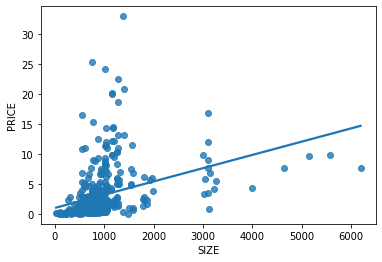

In [20]:
# creating  line regression and scatter plot in same graph 

x= dataa.SIZE
y= dataa.PRICE

sns.regplot(x, y, ci=None)

plt.show()

In [48]:
#creating linear regression model


# Split the data into test and train.
# Considering training/test as 80/20.

from sklearn.model_selection import train_test_split

#X= dataa.SIZE
#y= dataa.PRICE
X_train, X_test, y_train, y_test = train_test_split(dataa[['SIZE']], dataa[['PRICE']], train_size = 0.8, 
                                                    test_size = 0.2)

# Take a look at the train dataset



X_train.shape, X_test.shape, y_train.shape, y_test.shape


((344, 1), (86, 1), (344, 1), (86, 1))

In [65]:
X_train
y_train

,PRICE
414,2.202500
382,1.760000
240,0.682000
95,0.772500
48,0.715000
...,...
390,0.516516
371,2.860000
420,0.544554
124,0.491071


In [69]:
#linear regression 

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
LR = reg.fit(X_train,y_train) 





In [70]:
y_test_pred = LR.predict (X_test) # Predicting the y value using x for test data.

In [71]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squ = r2_score(y_test, y_test_pred)
print('r squared for the test set: {:.2f}'.format(r_squ))

#Finding mean square error

from sklearn.metrics import mean_squared_error
ms = mean_squared_error (y_test, y_test_pred)
print('MSE for the test set: {:.2f}'.format(ms))

#Finding Root mean square error.

import math 
RMS = math.sqrt(ms)
print('RMS for the test set: {:.2f}'.format(RMS))

r squared for the test set: 0.12
MSE for the test set: 22.02
RMS for the test set: 4.69


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


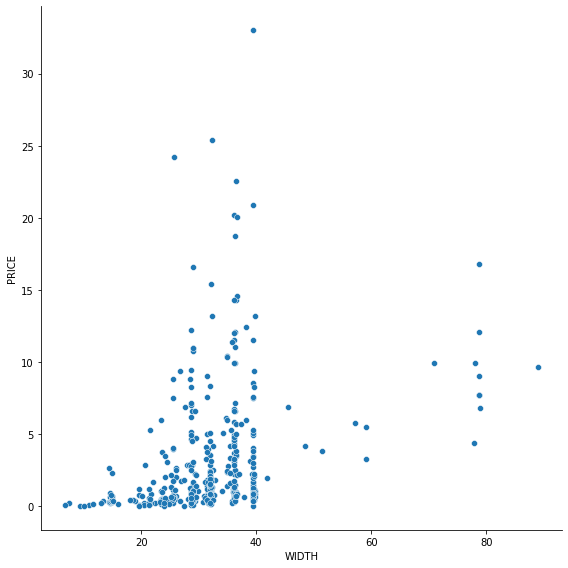

In [62]:
#scatterplot between the SIZE as independent and Price as dependent


sns.pairplot(dataa, x_vars=['WIDTH'], 
             y_vars='PRICE', size=8, aspect=1, kind='scatter')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


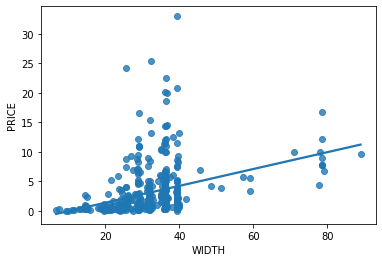

In [63]:
x1= dataa.WIDTH
y2= dataa.PRICE

sns.regplot(x1, y2, ci=None)

plt.show()

In [64]:
#creating linear regression model


# Split the data into test and train.
# Considering training/test as 80/20.

from sklearn.model_selection import train_test_split

#X= dataa.SIZE
#y= dataa.PRICE
X_train, X_test, y_train, y_test = train_test_split(dataa[['WIDTH']], dataa[['PRICE']], train_size = 0.8, 
                                                    test_size = 0.2)

# Take a look at the train dataset



X_train.shape, X_test.shape, y_train.shape, y_test.shape

((344, 1), (86, 1), (344, 1), (86, 1))

In [74]:
#linear regression 

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
LR1 = reg.fit(X_train,y_train) 



In [73]:
y_test_pred = LR1.predict (X_test) # Predicting the y value using x for test data.

In [75]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squ = r2_score(y_test, y_test_pred)
print('r squared for the test set: {:.2f}'.format(r_squ))

#Finding mean square error

from sklearn.metrics import mean_squared_error
ms = mean_squared_error (y_test, y_test_pred)
print('MSE for the test set: {:.2f}'.format(ms))

#Finding Root mean square error.

import math 
RMS = math.sqrt(ms)
print('RMS for the test set: {:.2f}'.format(RMS))

r squared for the test set: 0.12
MSE for the test set: 22.02
RMS for the test set: 4.69


In [78]:
# Multivariate Linear Regression model

#considering the normalization of the raw data

#Create dummy columns of the HOUSE variable

Houses_dummy = pd.get_dummies(dataa['HOUSE '], prefix='HOUSE')
dataa=dataa.join(Houses_dummy) # Join the all join House colums 

In [79]:
y = dataa["PRICE"]
x = dataa[["SIGNED","PICTURE","SIZE","HOUSE_1","HOUSE_2","HOUSE_3"]]
x.head()

,SIGNED,PICTURE,SIZE,HOUSE_1,HOUSE_2,HOUSE_3
0,1,1,545.28,1,0,0
1,1,2,816.64,0,1,0
2,0,3,109.71,0,0,1
3,1,4,822.40,0,1,0
4,1,4,822.40,0,1,0


In [81]:
X_train, X_test, y_train, y_test = train_test_split(dataa[["SIGNED","PICTURE","SIZE","HOUSE_1","HOUSE_2","HOUSE_3"]], dataa['PRICE'], train_size = 0.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((344, 6), (86, 6), (344,), (86,))

In [83]:
 #Multiple Linear Regression 

from sklearn.linear_model import LinearRegression 
MLR = LinearRegression()
LR3  = MLR.fit (X_train, y_train)

In [85]:
y_test_pred = LR3.predict (X_test)

In [86]:
# Calculate the error of the prediction with test data.

# Finding mean square error

from sklearn.metrics import mean_squared_error, r2_score
MS3 = mean_squared_error (y_test, y_test_pred)
print('MS3 for the test set: {:.2f}'.format(MS3))

#R2_Score 

r3 = r2_score (y_test, y_test_pred)
print('R2_Score for the test set: {:.2f}'.format(r3))

#Root mean square error

import math 
RMS3 = math.sqrt(MS3)
print('RMSE for the test set: {:.2f}'.format(RMS3))

MS3 for the test set: 9.46
R2_Score for the test set: 0.12
RMSE for the test set: 3.08
